# IMPORT LIBRARY

In [1]:
import cv2
import matplotlib.pyplot as plt #untuk memvisualisasi data
import numpy as np #untuk membaca angka

## Membaca Data Gambar

In [2]:
img = cv2.imread('Asset/img_gray.jpg')

In [3]:
img.shape

(83, 124, 3)

## Membuat Baris dan Kolom

In [4]:
(baris, kolom) = img.shape [:2]

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Menampilkan Histogram

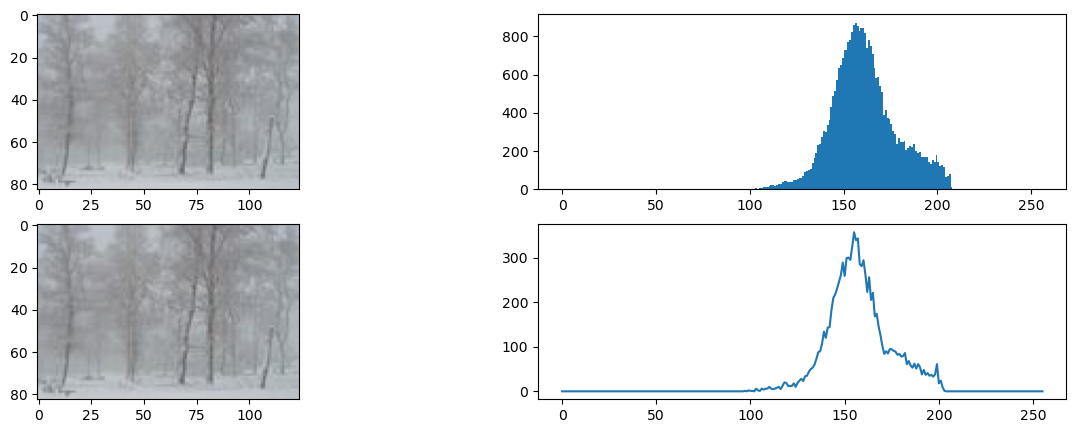

In [6]:
# Cara 1
fig, axs = plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256,[0,256])

#Cara 2
hist = cv2.calcHist([img], [0], None, [256], [0,256])
axs[1,0].imshow(img)
axs[1,1].plot(hist)
plt.show()

## Operasi Pixcel Untuk Meingkatkan Kecerahan

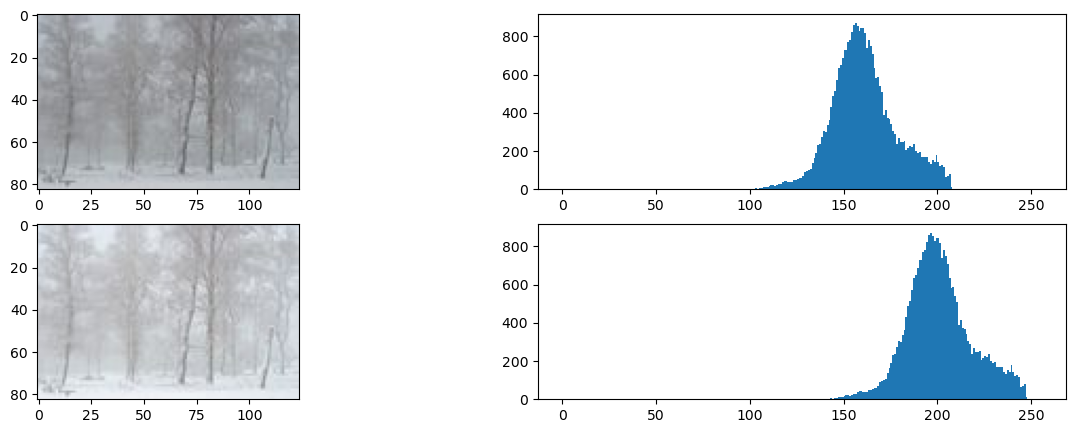

In [7]:
beta = 40 #beta atau bias -> untuk kecerahan
citra_cerah = np.zeros((baris,kolom,3)) # mengubah semua elemen array menjadi 0

for x in range(baris) :
    for y in range (kolom) :
        gyx = img[x,y] + beta
        citra_cerah[x,y] = gyx
        
citra_cerah = citra_cerah.astype(np.uint8)

fig, axs = plt.subplots(2,2, figsize = (15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256,[0,256])
axs[1,0].imshow(citra_cerah)
axs[1,1].hist(citra_cerah.ravel(), 256,[0,256])
plt.show()

## Operasi Piksel untuk Meregangkan Kontras

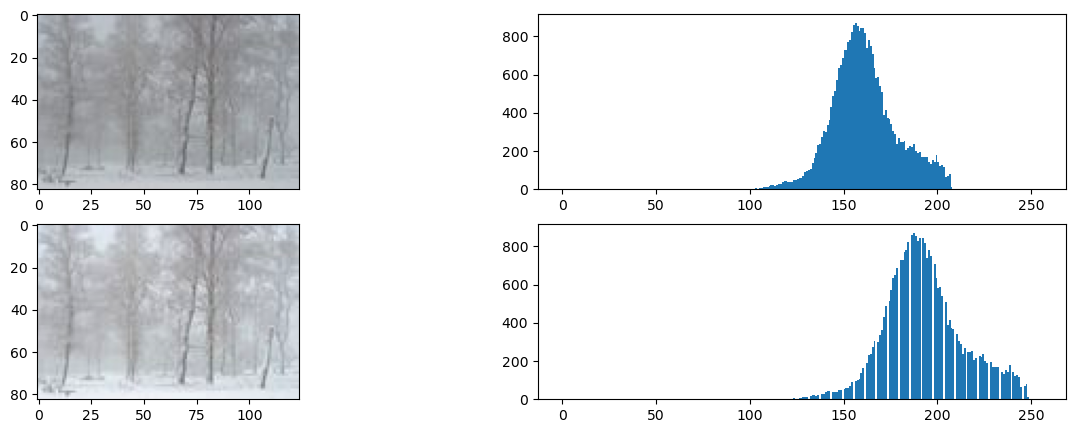

In [8]:
alpa = 1.2 #alpa atau gain -> untuk kontras
citra_kontras = np.zeros((baris,kolom,3))

for x in range(baris) :
    for y in range (kolom) :
        gmx = img[x,y] * alpa
        citra_kontras[x,y] = gmx
        
citra_kontras = citra_kontras.astype(np.uint8)

fig, axs = plt.subplots(2,2, figsize = (15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256,[0,256])
axs[1,0].imshow(citra_kontras)
axs[1,1].hist(citra_kontras.ravel(), 256,[0,256])
plt.show()

## Operasi Piksel Gabungan

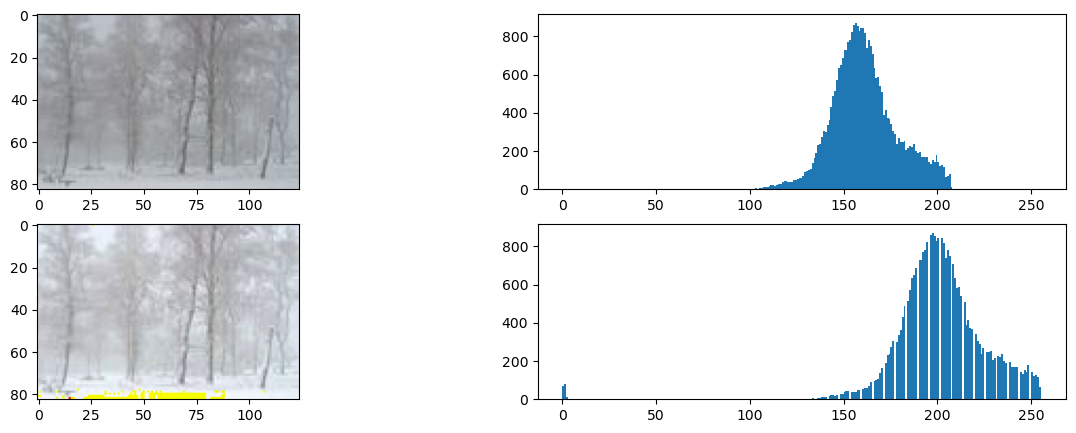

In [9]:
alpa = 1.2
beta = 10

citra_gabungan = np.zeros((baris,kolom,3))

for x in range(baris) :
    for y in range (kolom) :
        gcx = (img[x,y] * alpa) + beta
        citra_gabungan[x,y] = gcx
        
citra_gabungan = citra_gabungan.astype(np.uint8)

fig, axs = plt.subplots(2,2, figsize = (15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256,[0,256])
axs[1,0].imshow(citra_gabungan)
axs[1,1].hist(citra_gabungan.ravel(), 256,[0,256])
plt.show()

## Membalik Citra

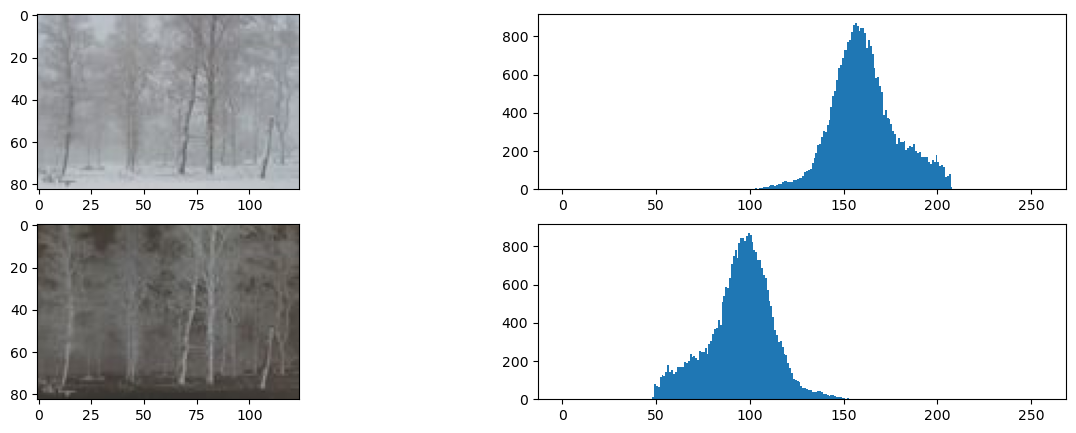

In [10]:
citra_negatif = np.zeros((baris,kolom,3))

for x in range(baris) :
    for y in range (kolom) :
        gcx = 255 - img[x,y]
        citra_negatif[x,y] = gcx
        
citra_negatif = citra_negatif.astype(np.uint8)

fig, axs = plt.subplots(2,2, figsize = (15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256,[0,256])
axs[1,0].imshow(citra_negatif)
axs[1,1].hist(citra_negatif.ravel(), 256,[0,256])
plt.show()

## Ketetanggan Piksel 

In [11]:
citra = cv2.imread("Asset/mobil.jpg")
citra = cv2.cvtColor(citra, cv2.COLOR_BGR2GRAY)

In [12]:
copyCitra1 = citra.copy().astype(float)

m1, n1 = copyCitra1.shape
output1 = np.empty([m1,n1])

print("Shape copy citra 1 : ", copyCitra1.shape)
print("Shape output citra 1 : ", output1.shape)

print('m1 : ', m1)
print('n1 : ', n1)
print()

Shape copy citra 1 :  (222, 177)
Shape output citra 1 :  (222, 177)
m1 :  222
n1 :  177



## Membuat Filter Rata-Rata

In [13]:
for baris in range (0, m1-1):
    for kolom in range (0, n1-1):
        a1 = baris
        b1 = kolom
        jumlah = copyCitra1[a1-1, b1-1] + copyCitra1[a1-1, b1] + copyCitra1[a1-1, b1-1] +\
                     copyCitra1[a1, b1-1] + copyCitra1[a1, b1] + copyCitra1[a1, b1-1] +\
                     copyCitra1[a1+1, b1-1] + copyCitra1[a1+1, b1] + copyCitra1[a1+1, b1+1] 
        output1[a1,b1] = 1/9 * jumlah
    

C:\Users\kashrina\anaconda3\Lib\site-packages\matplotlib\image.py:455: RuntimeWarning: overflow encountered in scalar multiply
  newmin = vmid - dv * fact
C:\Users\kashrina\anaconda3\Lib\site-packages\matplotlib\image.py:460: RuntimeWarning: overflow encountered in scalar multiply
  newmax = vmid + dv * fact


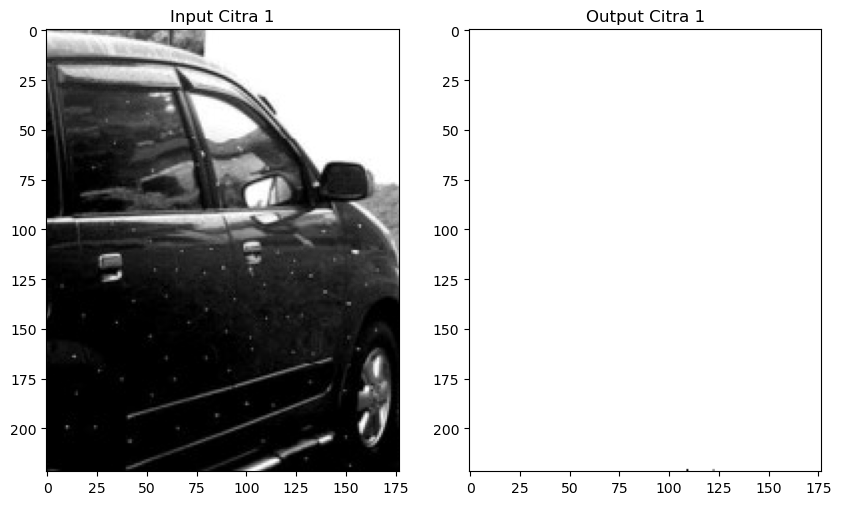

In [14]:
fig, axis = plt.subplots(1,2, figsize=(10,10))
ax = axis.ravel()

ax[0].imshow(citra, cmap='gray')
ax[0].set_title('Input Citra 1')

ax[1].imshow(output1, cmap='gray')
ax[1].set_title('Output Citra 1')
plt.show()

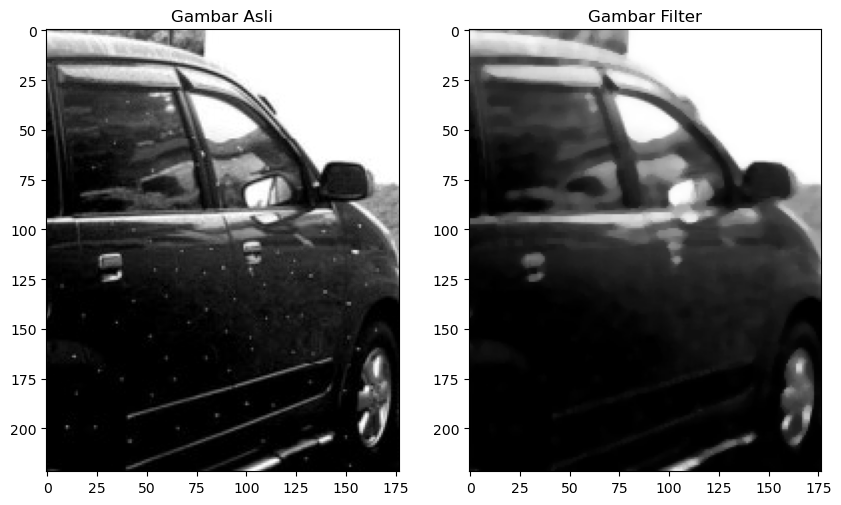

In [15]:
img_median = citra.copy()
img_median = cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB)
img_median_after = cv2.medianBlur(img_median, 5) # ini 50 persen, kalau mau diganti dengan angka yang ganjil

fig, axis = plt.subplots(1,2, figsize=(10,10))
ax = axis.ravel()

ax[0].imshow(citra, cmap='gray')
ax[0].set_title('Gambar Asli')

ax[1].imshow(img_median_after, cmap='gray')
ax[1].set_title('Gambar Filter')
plt.show()

# Menyiapkan Kernel Konvolusi

In [16]:
kernel = np.array([[-1,0,-1],
                 [0,4,0],
                 [-1,0,-1]])

## Memproses citra dengan konvolusi menggunakan FILTER2D

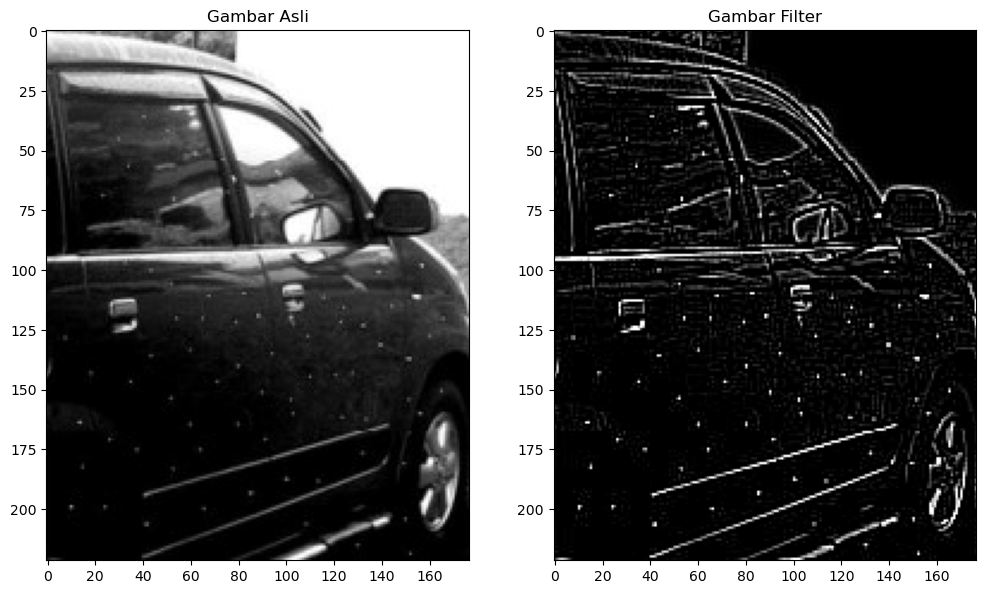

In [17]:
citraOutput = cv2.filter2D(citra, -1, kernel)

fig, axes = plt.subplots(1,2, figsize=(12,12))
ax = axes.ravel()

ax[0].imshow(citra, cmap='gray')
ax[0].set_title('Gambar Asli')

ax[1].imshow(citraOutput, cmap='gray')
ax[1].set_title('Gambar Filter')
plt.show()